In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_25205_Z')

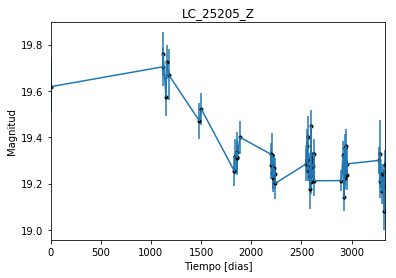

In [2]:
data = np.genfromtxt('LC_25205_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_25205_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

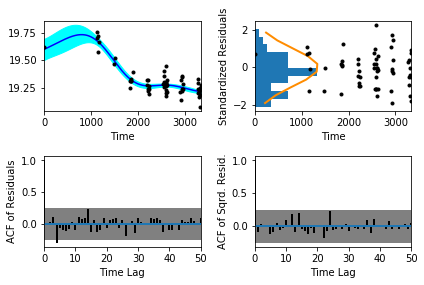

In [5]:
sample.assess_fit()

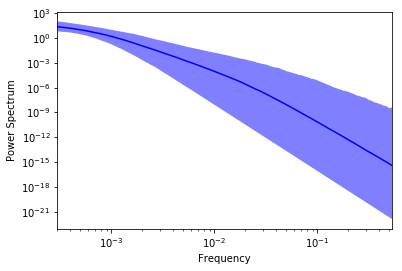

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_25205_Z')

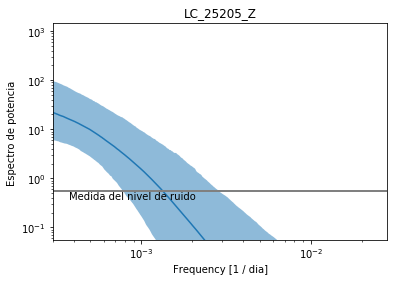

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_25205_Z')

Text(0.5,1,'Prediccion , valor esperado LC_25205_Z ')

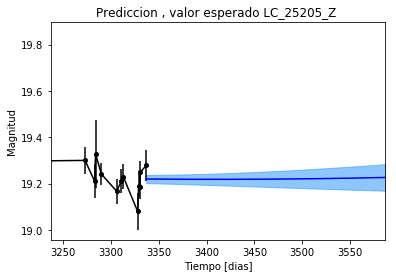

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_25205_Z ')


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_25205_Z')

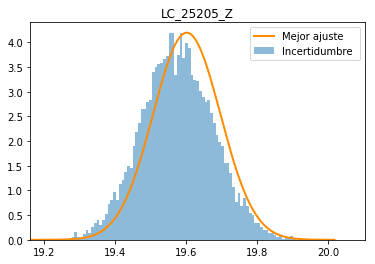

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_25205_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_25205_Z')

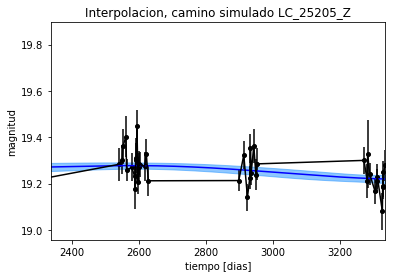

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_25205_Z')


Text(0.5,1,'Interpolacion, camino simulado LC_25205_Z')

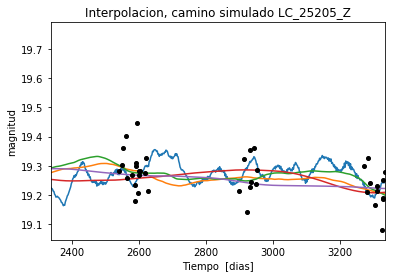

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_25205_Z')


In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 390.699061634
Median: 0.00796622339881
Standard deviation: 0.185555479261
68% credibility interval: [ 0.00051555  0.14630949]
95% credibility interval: [  3.14752401e-04   7.53119211e-01]
99% credibility interval: [  3.02905301e-04   9.66545428e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 871.373341817
Median: 0.000584927340783
Standard deviation: 0.0678884724902
68% credibility interval: [ 0.00034397  0.00846554]
95% credibility interval: [ 0.00030566  0.16611995]
99% credibility interval: [  3.00755306e-04   5.33409033e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 732.551440392
Median: 0.00447560325002
Standa

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 496.377463332
Median: 101.912788515
Standard deviation: 1.82459041333
68% credibility interval: [ 100.00121571  103.52361152]
95% credibility interval: [  97.44500785  104.56933418]
99% credibility interval: [  95.38304494  104.92385297]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1054.93032743
Median: 0.39976193236
Standard deviation: 1.95005298525
68% credibility interval: [ 0.03157806  3.05916368]
95% credibility interval: [ 0.01140566  6.58275841]
99% credibility interval: [  8.73107149e-03   9.81925265e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 657.384441133
Median: 0.0426922248933
Standard deviation: 6.5872643775
68% credibility interval: [  9.90988177e-04   2.37580699e+00]
95% credibility interva

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5331.61153453
Median: 8.80719034432e-29
Standard deviation: 6.62874743447e+33
68% credibility interval: [  2.87719519e-53   1.56183924e-09]
95% credibility interval: [  3.97553629e-76   1.79750349e+00]
99% credibility interval: [  5.98255968e-92   1.94437286e+02]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 809.943412288
Median: 19.4153035709
Standard deviation: 0.123172509252
68% credibility interval: [ 19.31322355  19.52505239]
95% credibility interval: [ 19.17973477  19.6786267 ]
99% credibility interval: [ 19.06866872  19.84329999]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 339.823993098
Median: 8.24255237772e-05
Standard deviation: 0.183585534242
68% credibility interval: [ 0.         0.0994661]
95% credibility interval: [ 0.          0.73964743]
99% credibility interval: [ 0.          1.00169949]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 339.823993098
Median: 8.24255237772e-05
Standard deviation: 0.183585534242
68% credibility interval: [ 0.         0.0994661]
95% credibility interval: [ 0.          0.73964743]
99% credibility interval: [ 0.          1.00169949]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1588.96222587
Median: 0.0
Standard deviation: 0.000182444464302
68% cr

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 496.377463332
Median: 101.912788515
Standard deviation: 1.82459041333
68% credibility interval: [ 100.00121571  103.52361152]
95% credibility interval: [  97.44500785  104.56933418]
99% credibility interval: [  95.38304494  104.92385297]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1775.44539839
Median: 0.0346320558781
Standard deviation: 0.0417614640937
68% credibility interval: [ 0.01832079  0.06960026]
95% credibility interval: [ 0.01084224  0.14542609]
99% credibility interval: [ 0.00831455  0.26318784]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1118.96215567
Median: 0.905954586354
Standard deviation: 0.131886199488
68% credibility interval: [ 0.79174552  1.04818296]
95% credibility interval: [ 0.69533318  1.20389652]
99% credibility interval: [ 0.64348767  1.34051218]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1044.60881155
Median: 2.62286898092e-06
Standard deviation: 0.0250064158233
68% credibility interval: [  3.64039228e-08   2.21932661e-04]
95% credibility interval: [  1.16968731e-09   3.76527008e-03]
99% credibility interval: [  3.87834481e-10   6.17855662e-02]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 390.699061634
Median: (-0.0500532578131-0.255188396347j)
Standard deviation: 1.64007366393
68% credibility interval: [-0.91928961-2.31966032j -0.00323928-0.00269932j]
95% credibility interval: [ -4.73198756e+00+0.j          -1.97764766e-03-0.00022718j]
99% credibility interval: [ -6.07298403e+00+0.j          -1.90321014e-03-0.00184495j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 871.373341817
Median: (-0.00367520687338+0j)
Standard deviation: 1.22984413698
68% credibility interval: [-0.05319053+0.46681522j -0.00216121+0.j        ]
95% credibility interval: [-1.04376245+2.36224518j -0.00192054+0.j        ]
99% credibility interval: [ -3.35150780e+00+4.5202354j   -1.88970132e-03+0.00484144j]
Posterior summary for pa